### Basics of Logistic Regression

#### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

#### Load the Data

In [2]:
rawdata = pd.read_csv('2.01. Admittance.csv')
rawdata.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [4]:
data = rawdata.copy()
data["Admitted"] = data["Admitted"].map({"Yes":1,"No":0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


#### Variables

In [5]:
y = data["Admitted"]
x1 = data["SAT"]

### Let's Plot the data

#### Scatter Plot

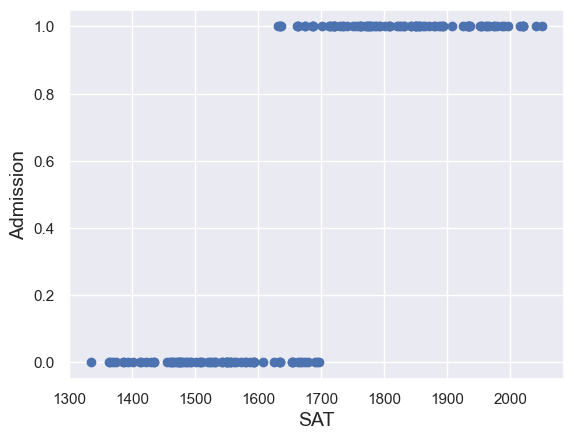

In [9]:
plt.scatter(x1, y, color="C0")
plt.xlabel("SAT", fontsize=14)
plt.ylabel("Admission", fontsize=14)
plt.show()

###  Plot a regression Line

C:\Users\Kishore\AppData\Local\Temp\ipykernel_36944\156140636.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = (x1 * results_lin.params[1]) + (results_lin.params[0])


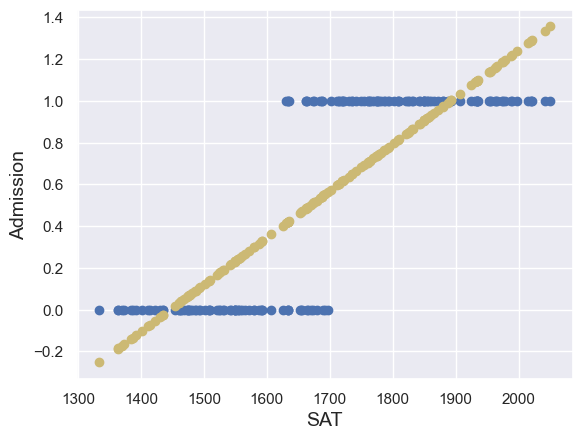

In [13]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1, y, color="C0")

yhat = (x1 * results_lin.params[1]) + (results_lin.params[0])

plt.scatter(x1, yhat, color="C8")
plt.xlabel("SAT", fontsize=14)
plt.ylabel("Admission", fontsize=14)
plt.show()

#### Plot with a Logistic Regression Curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


C:\Users\Kishore\AppData\Local\Temp\ipykernel_36944\1028693048.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1, results_lin.params[0], results_lin.params[1]))


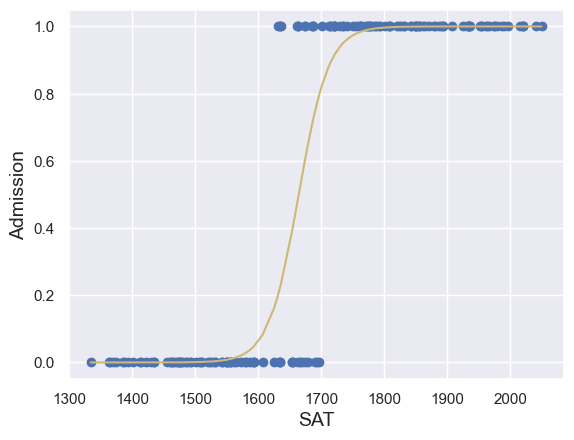

In [19]:
reg_log = sm.Logit(y, x)
results_lin = reg_log.fit()

def f(x, b0, b1):
    return np.array(np.exp(b0 + b1*x) / (1 + np.exp(b0+ b1*x)))

f_sorted = np.sort(f(x1, results_lin.params[0], results_lin.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color="C0")

plt.xlabel("SAT", fontsize=14)
plt.ylabel("Admission", fontsize=14)
plt.plot(x_sorted, f_sorted, color="C8")
plt.show()

### Regression

In [20]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


### Summary

In [21]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Mar 2025   Pseudo R-squ.:                  0.7992
Time:                        21:35:37   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""